In [1]:
import numpy as np
import simple_model_ode as sm

In [5]:
LDM = sm.SimplifiedModel(data_analysis=False)
state = [np.deg2rad(17), 0, 0,  0 , 0, 0]
LDM.inverseLinkLegODE(state)

array([-6.41574,  0.     ])

time spent 0.007699251174926758


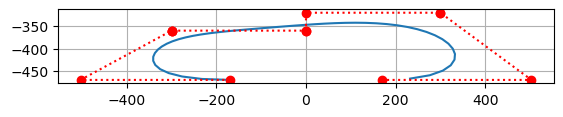

In [5]:
from Bezier import Bezier
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
t_points = np.arange(0, 1, 0.02)

v_desire = 1000
T_sw = 0.25

test = a([[-170, -470],
          [-(170 + v_desire/((12)*T_sw)), -470],
          [-300, -360],
          [-300, -360],
          [-300, -360],
          [0, -360],
          [0, -360],
          [0, -320],
          [300, -320],
          [300, -320],
          [170 + v_desire/((12)*T_sw), -470],
          [170, -470]])


t = time.time()
test_set_1 = Bezier.Curve(t_points, test)
print("time spent", time.time() - t)

# plt.xticks([i1 for i1 in range(-20, 20)]), plt.yticks([i1 for i1 in range(-20, 20)])

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(b=True, which='major', axis='both')

plt.plot(test_set_1[:, 0], test_set_1[:, 1])
plt.plot(test[:, 0], test[:, 1], 'ro:')
plt.show()

Fitting Polynomial [ 4.11916505e+05 -6.26591689e+05  4.03501845e+05 -1.42028997e+05
  2.93956532e+04 -3.56716856e+03  2.44492931e+02 -7.12887643e+00]


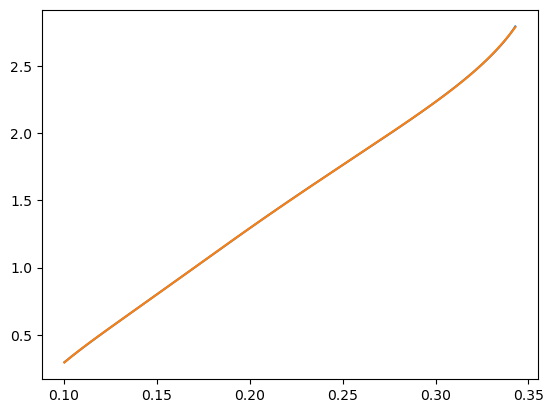

[[2.23187488]
 [0.        ]]
0.29670597283903605
[[ 0.        ]
 [-0.29994582]]


In [5]:
import numpy as np
import LegKinematics as lk
import matplotlib.pyplot as plt


lk.FowardKinematics(np.array([[np.deg2rad(17)], [0]]))
ths = np.linspace(np.deg2rad(17), np.deg2rad(160), 1000)

z_list = []

for th in ths:
    state = np.array([[th], [0]])
    z_list.append(-1 * lk.FowardKinematics(state)[1,0])

# p = np.polyfit(ths, z_list, 6)
# print("Fitting Polynomial", p)
# z_fit = np.polyval(p, ths)
# plt.plot(ths, z_list)
# plt.plot(ths, z_fit)
# plt.show()

p = np.polyfit(z_list, ths, 7)
print("Fitting Polynomial", p)
th_fit = np.polyval(p, z_list)
plt.plot(z_list, ths)
plt.plot(z_list, th_fit)
plt.show()

print(lk.InverseKinematicsPoly(np.array([[0], [-0.3]])))
print(np.deg2rad(17))

tb = lk.InverseKinematicsPoly(np.array([[0], [-0.3]]))
print(lk.FowardKinematics(tb))

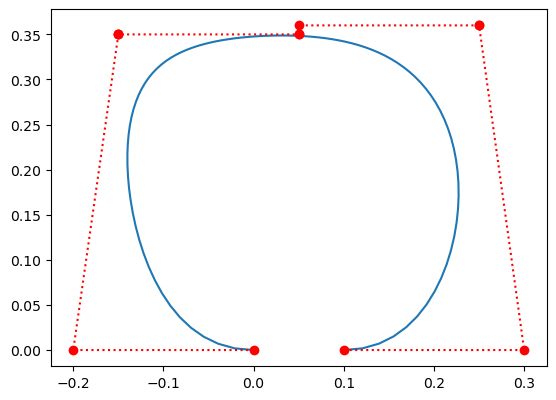

In [27]:
from Bezier import Bezier
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

h = 0.35
dh = 0.01
L = 0.1
dL1 = 0.2
dL2 = -0.05
dL3 = 0.2
dL4 = -0.05

c0 = np.array([0,0])
c1 = c0 - np.array([dL1, 0])
c2 = c1 - np.array([dL2, 0]) + np.array([0, h])
c3 = c2
c4 = c2
c5 = c4 + np.array([0.5 * L + dL1 + dL2, 0])
c6 = c5
c7 = c5 + np.array([0, dh])
c8 = c7 + np.array([0.5 * L + dL3 + dL4, 0])
c9 = c8
c10 = c8 - np.array([dL4, h + dh])
c11 = c10 - np.array([dL3, 0])

c_set = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11])
t_points = np.linspace(0, 1, 100)

curve = Bezier.Curve(t_points, c_set)

plt.plot(curve[:, 0], curve[:, 1])
plt.plot(c_set[:, 0], c_set[:, 1], "ro:")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

[[[0.00000000e+00 0.00000000e+00]
  [1.88873306e-02 1.88862077e-02]]

 [[1.88873306e-02 1.88862077e-02]
  [3.77746612e-02 3.77656782e-02]]

 [[3.77746612e-02 3.77656782e-02]
  [5.66619917e-02 5.66316770e-02]]

 ...

 [[9.36811597e+00 5.66316770e-02]
  [9.38700330e+00 3.77656782e-02]]

 [[9.38700330e+00 3.77656782e-02]
  [9.40589063e+00 1.88862077e-02]]

 [[9.40589063e+00 1.88862077e-02]
  [9.42477796e+00 3.67394040e-16]]]


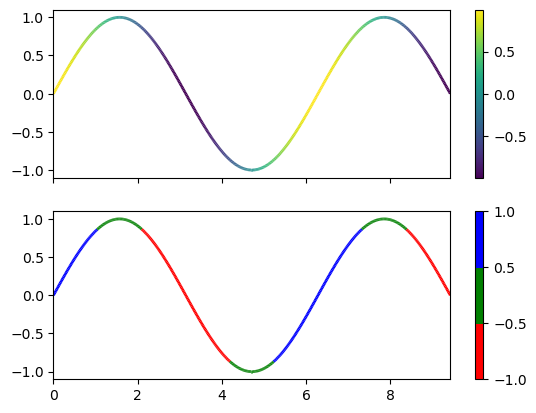

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

print(segments)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

TypeError: float() argument must be a string or a real number, not 'zip'

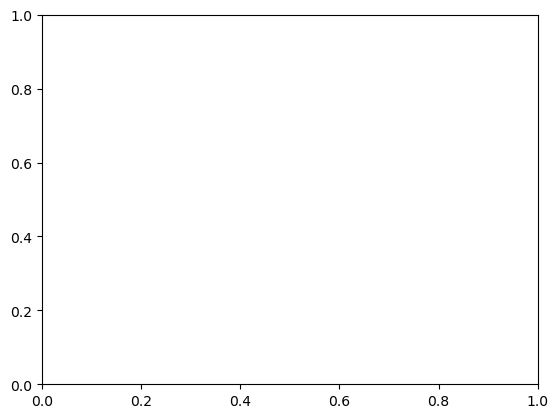

In [30]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# The x and y data to plot
y = np.array([1,2,17,20,16,3,5,4])
x = np.arange(len(y))

# Threshold above which the line should be red
threshold = 15

# Create line segments: 1--2, 2--17, 17--20, 20--16, 16--3, etc.
segments_x = np.r_[x[0], x[1:-1].repeat(2), x[-1]].reshape(-1, 2)
segments_y = np.r_[y[0], y[1:-1].repeat(2), y[-1]].reshape(-1, 2)

# Assign colors to the line segments
linecolors = ['red' if y_[0] > threshold and y_[1] > threshold else 'blue'
              for y_ in segments_y]

# Stamp x,y coordinates of the segments into the proper format for the
# LineCollection
segments = [zip(x_, y_) for x_, y_ in zip(segments_x, segments_y)]

# Create figure
plt.figure()
ax = plt.axes()

# Add a collection of lines
ax.add_collection(LineCollection(segments, colors=linecolors))

# Set x and y limits... sadly this is not done automatically for line
# collections
ax.set_xlim(0, 8)
ax.set_ylim(0, 21)